# Regression

<details>
Regression is a statistical method used to model the relationship between one **dependent variable** ($Y$) and one or more **independent variables** ($X$). The dependent variable, is the variable we want to predict or explain. The independent variable(s), are the factors or features that are used to make this prediction.

The relationship can be modeled by a linear equation:

$$Y = f(X) + \epsilon =β_0+β_1X_1+β_2X_2+…+β_nX_n+ε$$

- The target of analysis is the systematic dependence of $Y$ from $X$. 
- The regression function $f$ describes the dependence of the mean of $Y$ as a function of $X$.
- $β_0$​ is the intercept, representing the value of $Y$ when all independent variables are zero.
- $β_1,β_2,…,β_n​$ are the coefficients, indicating the effect of each independent variable on $Y$.
- $X_1,X_2,…,X_n$ are the independent variables.
- $ε$ is the error term, representing the difference between the observed $Y$ and the predicted $Y$. It accounts for unexplained variation.
- $\epsilon$ is usually assumed to be random with zero mean. 


- **Linear Regression** is usually used for predictive analysis. <br>
It determines the extent to which there is a linear relationship between $Y$ and $X_i$. <br>
It will give you a trend line (line of best-fit) plotted amongst a set of data points. <br>

- **Logistic regression** is used to calculate (or predict) the **probability [0, 1] 
of a binary (yes/no) event occurring**.


</details>

# Imports

In [18]:
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns


In [19]:
# Set the option to suppress the warnings
pd.set_option('mode.chained_assignment', None)

In [20]:
df = pd.read_csv("data/athletes_height.csv")
df.columns = ['gender', 'height', 'weight']
Y = df['height']
X = df['weight']

# Scatterplot
<details>

- The fastest way to see a relationship between two variables is graphically with a scatterplot.
- In a Scatterplot we can also see if there is a distortion by outliers in the dataset.  
- A Scatterplot can be summerized by the avergaes of the x and y values, as well as their <br>
standard devaitions $s_x, s_y$
- Observations appear as a cloud of dots, if the dots spread out and don't give the idea of a <br>
general relationship the Correlation Coefficient will tell us about the clustering of dots around a line.

</details>

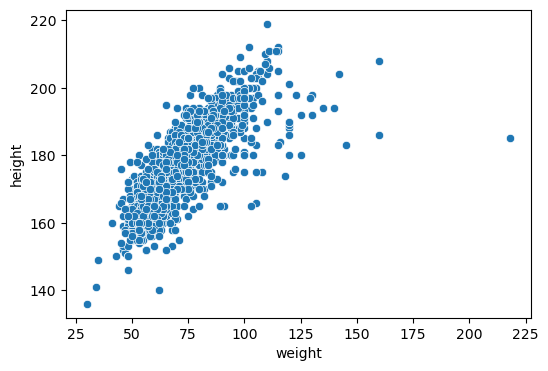

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.scatterplot(x=X, y=Y)

# SD Line
- the standard deviations $s_x, s_y$ give us a first possibility to construct a line describing the observations
- The lines goes through the **point of averages**, and climbes at the rate of one vertical standard deviation $s_y$ for each horizontal std $s_x$. The **slope of the sd-line** is $\frac{s_y}{s_x} $

- <u>To get from the line of standard deviation line to the regression line</u> the slope of the sd-line $\frac{s_y}{s_x}$ is adjusted with the correlation coefficient $r$. $\rightarrow r*\frac{s_y}{s_x}$
- Now each increase of $x$ by one $s_x$ is associated with an increase of $y$ by $r*s_y$.
- Using the correlation coefficient $r$ and the ratio of standard deviations $\frac{s_y}{s_x}$ to estimate the average value of $y$ for each value of $x$ is called the regression method.

- Why is $r$ the right factor? Consider this: 
  - Suppose $r = 0$ there is no association between x and y an increase in x does not affect y. 
  - If $r=1$ then all point lie on the SD Line. An increase of $x$ in one $s_x$ leads an increase of one $s_y$ in $y$.
  - If $r=-1$ when $x$ goes up one $s_x$ $\rarr$ $y$ goes down by $-s_y$

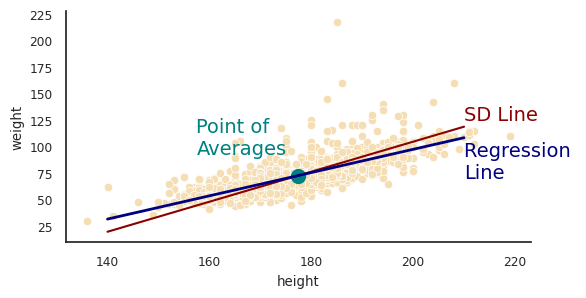

In [163]:
# the line extends from the point of averages
# from here it evolves into both directions with the slope of x * s_y/s_x

import numpy as np

s_y = np.std(df.weight, ddof=1)
s_x = np.std(df.height, ddof=1)
avg_y = np.mean(df.weight)
avg_x = np.mean(df.height)
x = np.linspace(140, 210, 100)

fig, ax = plt.subplots(figsize=(6, 3))
sns.set_style('white')
ax.spines[['top', 'right']].set_visible(False)

# scatterplot
ax = sns.scatterplot(x=df.height, y=df.weight, color='wheat')

# standard deviation line
slope_sd = s_y / s_x
sd_line = avg_y + (x - avg_x) * slope_sd
ax = plt.plot(x, sd_line, color='darkred')
plt.annotate(xy=(210, 125), text='SD Line', fontsize=14, color='darkred')

# point of averages
plt.scatter(avg_x, avg_y, s=100, color='teal') 
plt.annotate(xy=(avg_x-20, avg_y+20), text='Point of \nAverages', fontsize=14, color='teal')

# Regession line
r_xy = np.corrcoef(x=df.height, y=df.weight)[0, 1]
reg_line = avg_y + (x - avg_x) * (s_y / s_x) * r_xy
ax = plt.plot(x, reg_line, color='navy', linewidth=2)
plt.annotate(xy=(210, 70), text='Regression \nLine', fontsize=14, color='navy')

plt.show()

# Simple Linear Regression 

<details>

-  "simple" because it involves only one independent variable
- "linear" because relationship between the predictor variable and the target variable is modeled as a straight line meaning that changes in the predictor variable are associated with a constant change in the target variable

## OLS
The Ordinary Least Squares (OLS) method is a statistical technique used in regression analysis to estimate the parameters (coefficients) of a linear regression model. Its goal is to find the line that minimizes the sum of the squared vertical distances (residuals) between the observed data points and the predicted values on the regression line.

</details>

In [22]:

# how does weight Y depend on height X - the intercept term is hidden but could be made explicit by writting:
# formula='weight ~ 1 + height'
model = smf.ols(formula='weight ~ height', data=df).fit()
model.params

Intercept   -122.309858
height         1.098687
dtype: float64

## mean-centering
<details>
- Without mean-centering, the intercept $\beta_0$ represents the estimated weight when height is zero. This interpretation might not make sense in real-world situations since a height of zero is not meaningful.
- After mean-centering, the intercept represents the estimated weight when height is at its mean value.
</details>


In [23]:
# the intercept above has no interpretable meaning we can change this by 
# mean-centering the explanatory variable
df.loc[:, 'height_centered'] = df['height'] - df.height.mean()
df.head()

,gender,height,weight,height_centered
0,M,170,69,-7.451166
1,W,171,64,-6.451166
2,M,167,52,-10.451166
3,M,168,68,-9.451166
4,M,177,78,-0.451166


In [24]:
df.weight.mean()

72.65343415248897

In [25]:
# now the Intercept (when all X variables are 0) is equal to the average weight in the sample
# the coefficient of height_centered is the impact of one centimeter increase in height on the weight
model = smf.ols(formula='weight ~ height_centered', data=df).fit()
model.params

Intercept          72.653434
height_centered     1.098687
dtype: float64

# Multiple Regression

<details>
- multiple explanatory variables
$$Y =β_0+β_1X_1+β_2X_2+…+β_nX_n+ε$$

## categorical variables 
- Categorical variables  need to be encoded in dummy variables / indicator variables
- When encoding a category there is always one characteristic that serves as a reference.
- E.g. if there is 4 characteristics of a category then we would binary encode 3 of them. 
If all three are zero the reference is implicitly one, else if a characteristic is switched on with 1 (one-hot-encoding), the interpretation of it's coefficient is the effect the characteristic has on the target compared to the reference characteristic, holding all other variables constant.

In the example below:

- $X_{man}$​ takes on the value of 1 if the individual is male, and 0 if the individual is not male (which in this case means female).

$$Y=β_0+β_1⋅X_1+β_2⋅X_{man}+ε$$

Here's how you would interpret the coefficients:

- $β_0$​ is the intercept, representing the estimated weight when both height and gender are zero. Which is the the weight of a female whose height is equal to the average height observed in the data. 
- $β_1$​ represents the change in weight associated with a one-unit change in mean-centered height, holding gender constant.
- $β_2$​ represents the difference in weight between males and not males (in this case, females).

Specifically:

- If $β_2$​ is positive and statistically significant, it suggests that males tend to have higher weights compared to females, holding height constant.
- If $β_2$​ is negative and statistically significant, it suggests that males tend to have lower weights compared to females, holding height constant.
- If $β_2$​ is not statistically significant, it suggests that there isn't a significant difference in weight between males and not males, holding height constant.


</details>

In [26]:
# one-hot encoding
df['X_man'] = df['gender'].map(lambda x: 1 if x == 'M' else 0)
df.head()

,gender,height,weight,height_centered,X_man
0,M,170,69,-7.451166,1
1,W,171,64,-6.451166,0
2,M,167,52,-10.451166,1
3,M,168,68,-9.451166,1
4,M,177,78,-0.451166,1


In [27]:
df.query("gender == 'W'").weight.mean()

63.14206128133705

In [28]:
# ß_0: weight of a female whose height is equal to the average height observed in the data 
# ß_1: additional weight for male compared to females
# ß_0: increase in weight for every unit increase in height

model = smf.ols(formula='weight ~ X_man + height_centered', data=df).fit()
model.params

Intercept          69.626653
X_man               5.527619
height_centered     0.966978
dtype: float64

## Interaction Variable 

<details>

- $\beta_3$ :the interaction term ``X_man:height_centered`` between gender and mean-centered height represents the additional change in weight associated with a one-unit change in mean-centered height for males, on top of the effect of height for not males.
- If this coefficient is statistically significant, it means that the effect of height on weight differs between males and not males.
- $\beta_0$: weight of a female of average height, c.t.
- $\beta_1$: additional weight for man compared to woman, when height is eual to average height c.t.
- $\beta_0 + \beta_1$: total weight for a man of average height.
- $\beta_2$:  impact of one centimeter increase in height on the weight for females, c.t.  
- $\beta_3$: **additonal impact** of height on weight for **males**
- $\beta_2 + \beta_3$ **total impact** of height on weight for **males**.

</details>

In [29]:
model = smf.ols(formula='weight ~ X_man + height_centered + X_man:height_centered', data=df).fit()
model.params

Intercept                68.591626
X_man                     6.083041
height_centered           0.812635
X_man:height_centered     0.240902
dtype: float64

# Model summary
<details>
## R-squared
- $R^2$: shows percentage of the variation in $Y$ that can be explained by the regression model
- A R-squared value near 1 would suggest a good fit (goodness-of-fit) of outr model on the data
- A low $R^2$ is not necessarily bad, maybe the model is missing important explanatory variables, it still  lets you infer a relationship between the X variables and Y.
- But with a low $R^2$ predictions would not be that accurate.
- Mere addition of X variables always increases $R^2$.
- Adjusted $R^2$ adjusts the $R^2$ for the number of X variables in the model.

## p-values of coefficients
- p-values show the probability of a coefficient having no impact.
- A high p-value would fortify the hypothesis $H_0$ that the coefficient has no impact.
- Low p-values (less than $α$) are good, bc. they suggest that the $H_0$ (no impact) is wrong.

## F-statistic:
- low p-value $\rightarrow$ significant model
- This tests whether the overall model is statistically significant. It assesses whether at least one of the independent variables is significantly related to the dependent variable.
- If the F-statistic has a **low p-value** (usually below a chosen significance level like 0.05), it **indicates** that the **model as** a whole is **statistically significant**.

## AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion):
- Lower values $\rightarrow$ better fit
- These are **measures of the model's goodness of fit and complexity**. Lower values indicate a better-fitting model.
- Compare models with different combinations of variables. The model with the lower AIC or BIC is generally preferred, as it strikes a balance between fit and complexity.

## Omnibus:
- low p-value $\rightarrow$ residuals not normal
- This is a **test of the normality** of the residuals. A low p-value suggests that the residuals are not normally distributed.
- If the Omnibus test is significant, it may indicate a violation of the assumption of normality in the residuals.

## Jarque-Bera:
- low p-value $\rightarrow$ residuals not normal
- This is another test for normality of the residuals. A low p-value suggests non-normality.
- Similar to the Omnibus test, a significant result may indicate a problem with the assumption of normality.

## Durbin-Watson:
- ca. 2 $\rightarrow$ residuals not autocorrelated 
- This tests for autocorrelation in the residuals (i.e., whether there is a pattern in the residuals).
- Values around 2 suggest no significant autocorrelation. Values significantly different from 2 may indicate a problem.

## Condition Number (Cond.No):
- High values $\rightarrow$ multicollinearity
- This measures multicollinearity, which is the extent to which independent variables are correlated. High values suggest multicollinearity.
- A high condition number may indicate that some independent variables are highly correlated. This can make it difficult to interpret the individual effects of those variables.

</details>

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     882.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:58:34   Log-Likelihood:                -5872.7
No. Observations:                1587   AIC:                         1.175e+04
Df Residuals:                    1583   BIC:                         1.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                68.5916      0.467    146.923      0.000      67.676      69.507
X_man                     6.0830      0.601     10.128      0.000       4.905       7.261
height_centered           0.8126      0.043     18.795      0.000       0.728       0.897
X_man:height_centered     0.2409      0.054      4.460      0.000       0.135       0.347
==============================================================================
Omnibus:                     1245.121   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59227.669
Skew:                           3.234   Prob(JB):                         0.00
Kurtosis:                      32.221   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Outliers
<details>
- Outliers can be defined by the Inter Quartile Range (IQR) and the upper and lower Quartiles (Q3, Q1).
- Quartiles cut the data in four parts, 25% of the data lie under the point of Q1 and 75% of the data lies below Q3.
- The IQR is the distance Q3-Q1, also called the mid-spread, 50% of the observations in the dataset fall into the IQR.
- Q2 is the median, and cuts the dataset in half. 
- IQR and Quartiles are used to build an Boxplot.
- An outlier can be defined as an observation over 1.5*IQR and under Q1 or over Q3. 
- Another method to detect outliers is by z-scores.

</details>

In [31]:
# outliers and inter quartile range
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1} | Q2: {Q3} | IQR: {IQR}")

Q1: 61.0 | Q2: 81.0 | IQR: 20.0


## Boxplot
<details>
- A Boxplot helps to only get the most important oberservations witout the outliers.
- showfliers=False, suppresses the plotting of outliers.
- without outliers we see a clearer picture of where the bulk of followers lie.
- we can spot outliers in the scatterplot or as dots far away from the body of boxplot (fliers)
- In the third boxplot the outliers are cut away and the quartiles (Q1, Q3) are marked by the inter-quartile range in which 50% of the observation lie.

</details>

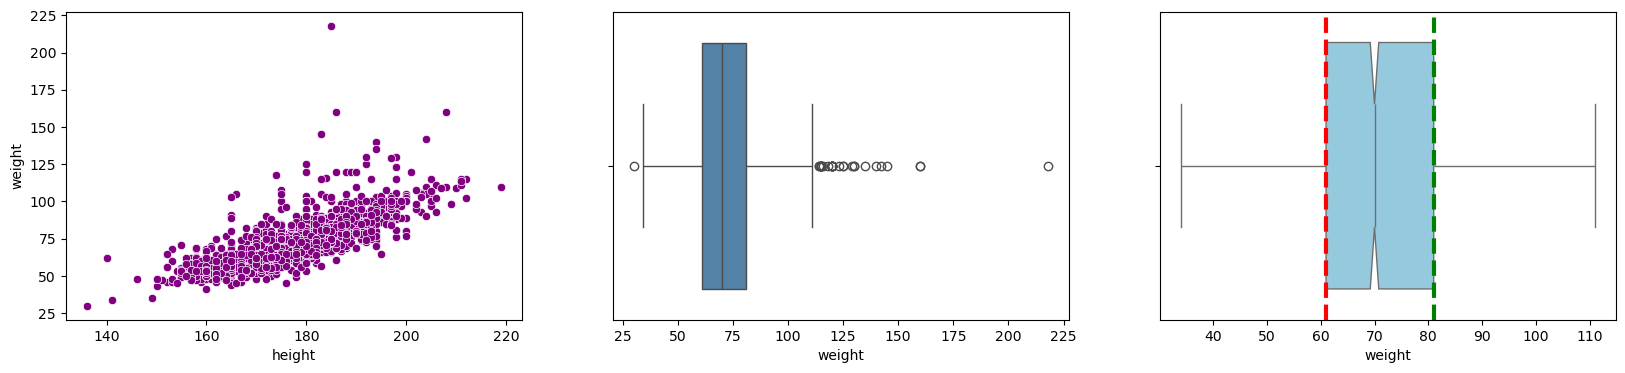

In [32]:
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize=(20, 4))

sns.scatterplot(x=df['height'], y=df['weight'], color="purple", ax=axes[0])  
sns.boxplot(data=df['weight'], orient="h", color="steelblue", ax=axes[1]) 
sns.boxplot(data=df['weight'], orient="h", notch=True, showfliers=False, color="skyblue", ax=axes[2])
axes[2].axvline(x=Q1, color='red', linestyle='--', linewidth=3)  
axes[2].axvline(x=Q3, color='green', linestyle='--', linewidth=3)
plt.show()

In [33]:
from stats_functions import cut_outliers
# custom function to cut outliers (see definition) here I use z_score outlier detection 
df_no_outliers = cut_outliers(df, 'weight', method='z')

In [34]:
# By removing outliers our last regression models R-squared increased from 0.626 to 0.681
model = smf.ols(
    formula="weight ~ X_man + height_centered + X_man:height_centered",
    data=df_no_outliers,
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1117.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:58:34   Log-Likelihood:                -5549.4
No. Observations:                1574   AIC:                         1.111e+04
Df Residuals:                    1570   BIC:                         1.113e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                68.5916      0.392    174.995      0.000      67.823      69.360
X_man                     5.6344      0.505     11.163      0.000       4.644       6.624
height_centered           0.8126      0.036     22.386      0.000       0.741       0.884
X_man:height_centered     0.1775      0.046      3.898      0.000       0.088       0.267
==============================================================================
Omnibus:                      413.913   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1638.111
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       7.359   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicollinearity
- One of the assumption for linear regresion is that there is no multicollinearity.
- Multicollinearity: is the correlattion of independent variables with each other. 
- If the X variables are highly correlated, it becomes challenging to determine the independent effect of each variable on the dependent variable. 
- Multicollinearity can lead to unstable and unreliable estimates of the regression coefficients.
- On the other hand, finding correlation between an X and Y is the purpose of regression analysis.

## Pairplot
- see all relationships in one plot

/home/mz/micromamba/envs/py/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


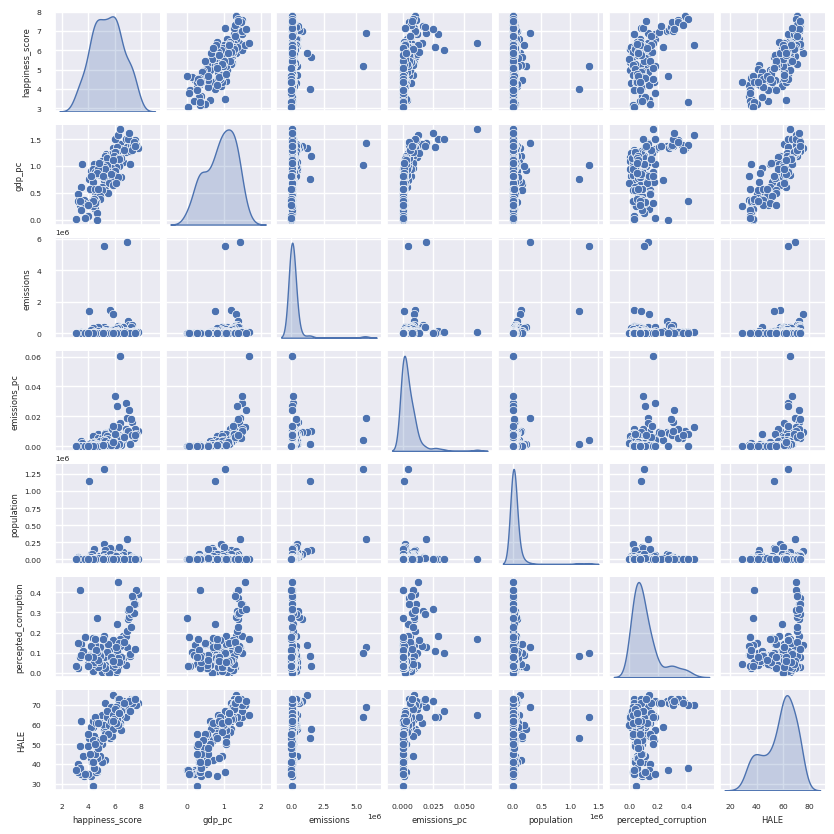

In [85]:
sns.set_style("white")
sns.set(font_scale=0.5)
sns.pairplot(emissions_reduced, height=1.2, diag_kind='kde')
plt.show()


## Heatmap
- A heatmap will provide a visual representation of the correlations between different variables in your dataset. 
- First build a correlation matrix with .corr() and feed the matrix to sns.heatmap()

In [44]:
emissions = pd.read_csv("../data/emissions_and_happiness.csv")
emissions_reduced = emissions[
    [
        "happiness_score",
        "gdp_pc",
        "emissions",
        "emissions_pc",
        "population",
        "percepted_corruption",
        "HALE", # Healthy life expectancy
    ]
]
emissions_reduced.head(2)

,happiness_score,gdp_pc,emissions,emissions_pc,population,percepted_corruption,HALE
0,6.892,1.433,5776431.5,0.019074,302841.0,0.128,69.0
1,5.191,1.029,5547757.5,0.004176,1328474.0,0.100,64.0


<Axes: >

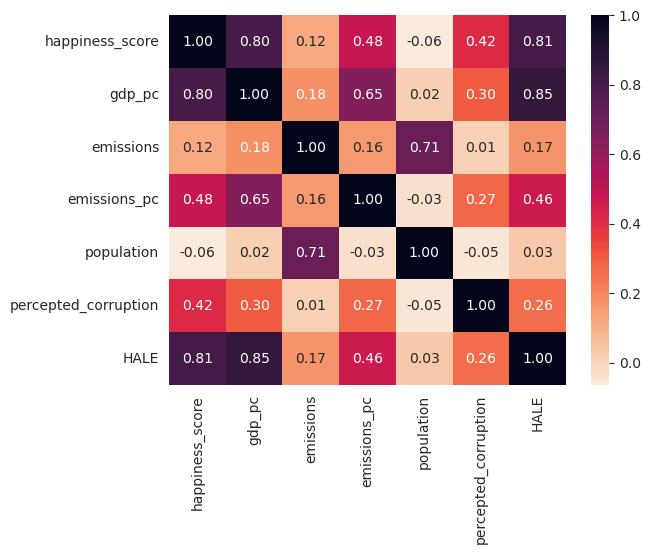

In [62]:
# we see high correlation between happiness and gdp_pc and HALE, 
# also emissions & population and gdp_pc and emissions_pc have high correlation

correlation_matrix = emissions_reduced.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f")

## model with collinearity

In [75]:
# lets first have a model that does not care about multicolinearity
model = smf.ols(
    formula="happiness_score ~ gdp_pc + emissions_pc + percepted_corruption + HALE + population + emissions",
    data=emissions_reduced,
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     61.08
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.36e-35
Time:                        05:37:13   Log-Likelihood:                -120.93
No. Observations:                 138   AIC:                             255.9
Df Residuals:                     131   BIC:                             276.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7734      0.322      5.514      0.000       1.137       2.410
gdp_pc                   1.0396      0.292      3.564      0.001       0.463       1.617
emissions_pc            -4.6524      9.205     -0.505      0.614     -22.861      13.556
percepted_corruption     2.1859      0.552      3.958      0.000       1.093       3.278
HALE                     0.0439      0.009      5.092      0.000       0.027       0.061
population             -8.9e-07   4.88e-07     -1.825      0.070   -1.85e-06    7.49e-08
emissions             9.709e-08   1.07e-07      0.904      0.368   -1.15e-07     3.1e-07
==============================================================================
Omnibus:                        8.157   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.038
Skew:                          -0.580   Prob(JB):                       0.0180
Kurtosis:                       3.225   Cond. No.                     1.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model without collinearity

In [77]:
# gdp_pc is highly correlated with emissions_pc and HALE we may just want to take one of these variables 
# to avoid multicollinearity, the Cond. No.	= 1.05e+04 suggests that there is multicollinearity.
# Also variable with p>0.05 are not significant and can be ignored

# By avoiding multicollinearity we may loose information and explanatory gain
model = smf.ols(
    formula="happiness_score ~ HALE + percepted_corruption",
    data=emissions_reduced,
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.14e-35
Time:                        05:40:13   Log-Likelihood:                -130.75
No. Observations:                 138   AIC:                             267.5
Df Residuals:                     135   BIC:                             276.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9610      0.271      3.551      0.001       0.426       1.496
HALE                     0.0729      0.005     15.265      0.000       0.063       0.082
percepted_corruption     2.5363      0.573      4.429      0.000       1.404       3.669
==============================================================================
Omnibus:                       15.753   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.479
Skew:                          -0.796   Prob(JB):                     0.000160
Kurtosis:                       3.710   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Links
curve fit:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

linear model:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

real python:
https://realpython.com/linear-regression-in-python/